In [234]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [235]:
df = pd.read_csv('csvfile/cp-data-mar-may-2018.csv')
test = pd.read_csv('csvfile/charge-sessions-june-sept.csv')

In [236]:
#결측치 비율 확인
df.isnull().sum()

Charging event      0
CP ID               0
Connector           0
Start Date          0
Start Time          0
End Date          114
End Time          114
Total kWh         114
Cost              188
Site                0
Group               0
Model               0
dtype: int64

In [237]:
#Charging Event, Site, Group, Model Column 삭제
df = df.drop(['Cost', 'Site', 'Group', 'Model', 'Charging event'], axis = 1)

In [238]:
df.head(5)

,CP ID,Connector,Start Date,Start Time,End Date,End Time,Total kWh
0,50230,1,01/04/2018,11:51,02/04/2018,11:03,0.00
1,50230,1,01/04/2018,10:58,01/04/2018,11:07,0.00
2,50230,1,01/04/2018,14:14,02/04/2018,7:56,2.47
3,50230,1,01/04/2018,9:51,01/04/2018,12:45,4.86
4,50230,2,01/04/2018,14:16,02/04/2018,10:28,9.47


In [239]:
#중복된값 삭제
df.drop_duplicates()

,CP ID,Connector,Start Date,Start Time,End Date,End Time,Total kWh
0,50230,1,01/04/2018,11:51,02/04/2018,11:03,0.000
1,50230,1,01/04/2018,10:58,01/04/2018,11:07,0.000
2,50230,1,01/04/2018,14:14,02/04/2018,7:56,2.470
3,50230,1,01/04/2018,9:51,01/04/2018,12:45,4.860
4,50230,2,01/04/2018,14:16,02/04/2018,10:28,9.470
...,...,...,...,...,...,...,...
16768,51550,2,31/05/2018,13:24,31/05/2018,13:45,14.524
16769,51550,2,31/05/2018,12:22,31/05/2018,13:01,19.566
16770,51550,2,31/05/2018,11:44,31/05/2018,12:08,8.770
16771,51550,2,31/05/2018,10:33,31/05/2018,10:43,4.293


In [240]:
# Total kWh = 0일때 데이터 상 Error 표시, 1이면 값 가짐
df['kWh_Error'] = np.where(df['Total kWh'] == 0, 0, 1)

In [241]:
#CP ID를 기준으로 그룹으로 묶어서 표현
groupby_cpid = df.groupby('CP ID')

In [242]:
# CP ID당 가지는 값의 개수 출력
df_cpid_cnt = pd.DataFrame( {'count' : groupby_cpid.size()}).reset_index()
df_cpid_cnt

,CP ID,count
0,50230,166
1,50234,48
2,50236,44
3,50238,79
4,50240,213
5,50261,68
6,50262,46
7,50263,296
8,50264,280
9,50265,31


In [243]:
df.head(20)

,CP ID,Connector,Start Date,Start Time,End Date,End Time,Total kWh,kWh_Error
0,50230,1,01/04/2018,11:51,02/04/2018,11:03,0.00,0
1,50230,1,01/04/2018,10:58,01/04/2018,11:07,0.00,0
2,50230,1,01/04/2018,14:14,02/04/2018,7:56,2.47,1
3,50230,1,01/04/2018,9:51,01/04/2018,12:45,4.86,1
4,50230,2,01/04/2018,14:16,02/04/2018,10:28,9.47,1
5,50230,1,01/04/2018,16:05,02/04/2018,11:03,0.00,0
6,50230,1,01/04/2018,13:07,01/04/2018,16:04,5.37,1
7,50230,2,01/04/2018,1:54,02/04/2018,10:42,20.48,1
8,50230,2,01/04/2018,1:53,01/04/2018,1:53,0.00,0
9,50230,2,01/04/2018,20:13,02/04/2018,7:03,5.87,1


In [244]:
df_startTime_group_Top20 = df['Start Time'].value_counts().head(20)

Text(0.5, 1.0, 'Start Time Top 20 ')

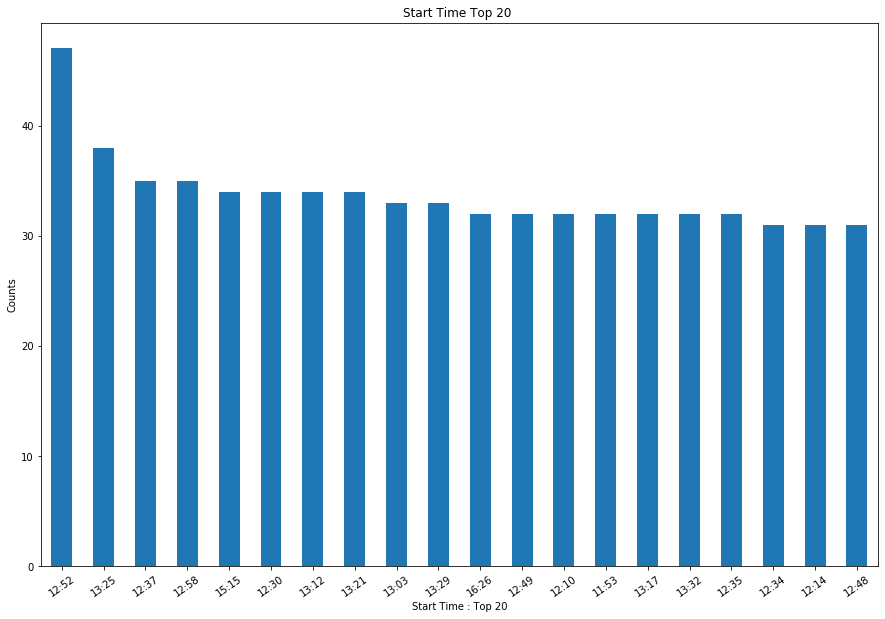

In [245]:
df_startTime_group_Top20.plot(kind='bar', figsize=(15,10))
plt.xlabel("Start Time : Top 20")
plt.xticks(rotation=35)
plt.ylabel("Counts")
plt.title("Start Time Top 20 ")


Text(0.5, 1.0, 'End Time Top 20 ')

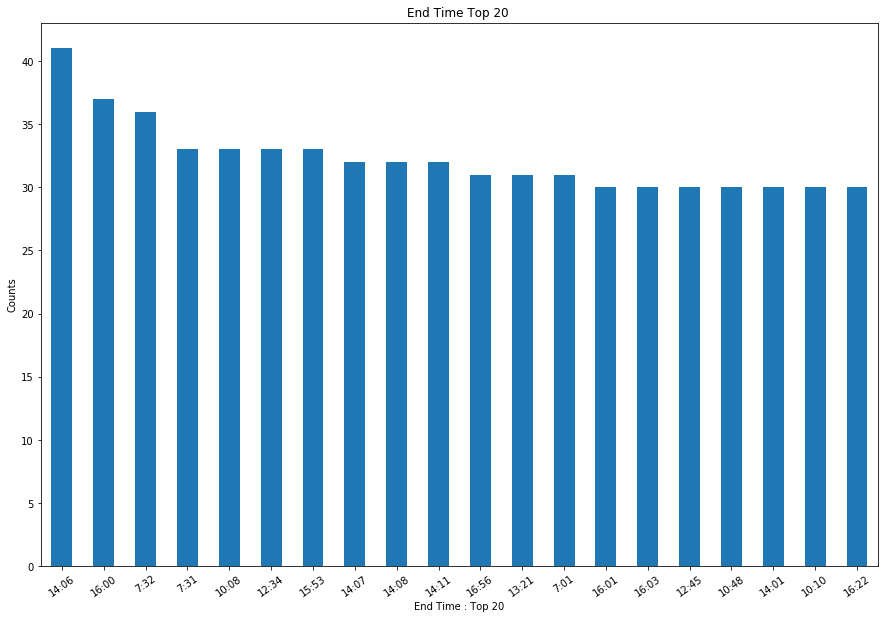

In [246]:
df_endTime_group_Top20 = df['End Time'].value_counts().head(20)
df_endTime_group_Top20.plot(kind='bar', figsize=(15,10))
plt.xlabel("End Time : Top 20")
plt.xticks(rotation=35)
plt.ylabel("Counts")
plt.title("End Time Top 20 ")


In [247]:
time_df = df[['Start Date', 'Start Time', 'End Date', 'End Time']]
time_df.head()

,Start Date,Start Time,End Date,End Time
0,01/04/2018,11:51,02/04/2018,11:03
1,01/04/2018,10:58,01/04/2018,11:07
2,01/04/2018,14:14,02/04/2018,7:56
3,01/04/2018,9:51,01/04/2018,12:45
4,01/04/2018,14:16,02/04/2018,10:28


In [248]:
#End Time과 End Date에 있는 NaN 값을 찾기 위해 새로운 데이터 프레임 생성
timenullcheck = time_df.isna()

In [249]:
df[358:361]

,CP ID,Connector,Start Date,Start Time,End Date,End Time,Total kWh,kWh_Error
358,50240,2,01/06/2018,12:18,NaN,NaN,NaN,1
359,50240,2,01/06/2018,10:29,01/06/2018,10:41,4.38,1
360,50240,2,01/06/2018,9:57,01/06/2018,10:15,11.98,1


In [250]:
#True면 NaN 값을 가지는 행이므로 인덱스 따로 저장
k = 0
nullDataIndex = []
nullDataFrame = []

for i in timenullcheck['End Date']:
    k = k+1
    if(i == True):
        nullDataIndex.append(k)

In [251]:
# df의 index에 접근하여 NaN값을 가진 데이터 따로 저장
for i in nullDataIndex:
    nullDataFrame.append(df[i-1:i])

In [252]:
# Null값을 가지지 않는 완벽한 데이터 프레임 = df_nullDelete
df_nullDelete = df.dropna()

In [253]:
#전체 16773 - 114
df_nullDelete.shape

(16659, 8)

In [254]:
# NaN값을 가지는 행들만 모아놓음
nullDataFrame

[     CP ID  Connector  Start Date Start Time End Date End Time  Total kWh  \
 358  50240          2  01/06/2018      12:18      NaN      NaN        NaN   
 
      kWh_Error  
 358          1  ,
      CP ID  Connector  Start Date Start Time End Date End Time  Total kWh  \
 547  50240          2  02/04/2018      11:25      NaN      NaN        NaN   
 
      kWh_Error  
 547          1  ,
      CP ID  Connector  Start Date Start Time End Date End Time  Total kWh  \
 602  50261          2  02/04/2018      15:01      NaN      NaN        NaN   
 
      kWh_Error  
 602          1  ,
      CP ID  Connector  Start Date Start Time End Date End Time  Total kWh  \
 740  50263          2  02/05/2018      18:23      NaN      NaN        NaN   
 
      kWh_Error  
 740          1  ,
      CP ID  Connector  Start Date Start Time End Date End Time  Total kWh  \
 829  50263          1  02/05/2018      11:24      NaN      NaN        NaN   
 
      kWh_Error  
 829          1  ,
       CP ID  Connector  

In [255]:
df_nullDelete.head(20)

,CP ID,Connector,Start Date,Start Time,End Date,End Time,Total kWh,kWh_Error
0,50230,1,01/04/2018,11:51,02/04/2018,11:03,0.00,0
1,50230,1,01/04/2018,10:58,01/04/2018,11:07,0.00,0
2,50230,1,01/04/2018,14:14,02/04/2018,7:56,2.47,1
3,50230,1,01/04/2018,9:51,01/04/2018,12:45,4.86,1
4,50230,2,01/04/2018,14:16,02/04/2018,10:28,9.47,1
5,50230,1,01/04/2018,16:05,02/04/2018,11:03,0.00,0
6,50230,1,01/04/2018,13:07,01/04/2018,16:04,5.37,1
7,50230,2,01/04/2018,1:54,02/04/2018,10:42,20.48,1
8,50230,2,01/04/2018,1:53,01/04/2018,1:53,0.00,0
9,50230,2,01/04/2018,20:13,02/04/2018,7:03,5.87,1


In [256]:
perfectDF = df_nullDelete[df_nullDelete['Total kWh']!=0]

In [257]:
perfectDF = perfectDF.reset_index(drop=True)

In [258]:
perfectDF.drop(['kWh_Error'], axis=1, inplace=True)

In [259]:
#널값, 0값들 하나도 없는 완전한 데이터
perfectDF

,CP ID,Connector,Start Date,Start Time,End Date,End Time,Total kWh
0,50230,1,01/04/2018,14:14,02/04/2018,7:56,2.470
1,50230,1,01/04/2018,9:51,01/04/2018,12:45,4.860
2,50230,2,01/04/2018,14:16,02/04/2018,10:28,9.470
3,50230,1,01/04/2018,13:07,01/04/2018,16:04,5.370
4,50230,2,01/04/2018,1:54,02/04/2018,10:42,20.480
...,...,...,...,...,...,...,...
16157,51550,2,31/05/2018,13:24,31/05/2018,13:45,14.524
16158,51550,2,31/05/2018,12:22,31/05/2018,13:01,19.566
16159,51550,2,31/05/2018,11:44,31/05/2018,12:08,8.770
16160,51550,2,31/05/2018,10:33,31/05/2018,10:43,4.293


In [260]:
perfectDF.to_csv("cleanData.csv", mode='w')